In [9]:
#importing necessary packages
import scipy as sp
import numpy as np
import pandas as pd
import pandas_profiling as pp
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced
from matplotlib import pyplot as plt
import random

#set seed
random.seed(420)

#loading csv into dataframe
url = 'https://raw.githubusercontent.com/shantanudeshpande94/bankruptcy-prediction/master/5year.csv'
bankruptcy_df = pd.read_csv(url)

# DATA CLEANING

In [10]:
bankruptcy_df.shape

(5910, 65)

In [11]:
#to replace '?' with NA values

bankruptcy_df.replace({'?': None},inplace =True)

In [12]:
#to check null values in a column

bankruptcy_df.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [14]:
#converting from object to float64

bankruptcy_df['Attr1'] = pd.to_numeric(bankruptcy_df['Attr1'])
bankruptcy_df['Attr2'] = pd.to_numeric(bankruptcy_df['Attr2'])
bankruptcy_df['Attr3'] = pd.to_numeric(bankruptcy_df['Attr3'])
bankruptcy_df['Attr4'] = pd.to_numeric(bankruptcy_df['Attr4'])
bankruptcy_df['Attr5'] = pd.to_numeric(bankruptcy_df['Attr5'])
bankruptcy_df['Attr6'] = pd.to_numeric(bankruptcy_df['Attr6'])
bankruptcy_df['Attr7'] = pd.to_numeric(bankruptcy_df['Attr7'])
bankruptcy_df['Attr8'] = pd.to_numeric(bankruptcy_df['Attr8'])
bankruptcy_df['Attr9'] = pd.to_numeric(bankruptcy_df['Attr9'])
bankruptcy_df['Attr10'] = pd.to_numeric(bankruptcy_df['Attr10'])
bankruptcy_df['Attr11'] = pd.to_numeric(bankruptcy_df['Attr11'])
bankruptcy_df['Attr12'] = pd.to_numeric(bankruptcy_df['Attr12'])
bankruptcy_df['Attr13'] = pd.to_numeric(bankruptcy_df['Attr13'])
bankruptcy_df['Attr14'] = pd.to_numeric(bankruptcy_df['Attr14'])
bankruptcy_df['Attr15'] = pd.to_numeric(bankruptcy_df['Attr15'])
bankruptcy_df['Attr16'] = pd.to_numeric(bankruptcy_df['Attr16'])
bankruptcy_df['Attr17'] = pd.to_numeric(bankruptcy_df['Attr17'])
bankruptcy_df['Attr18'] = pd.to_numeric(bankruptcy_df['Attr18'])
bankruptcy_df['Attr19'] = pd.to_numeric(bankruptcy_df['Attr19'])
bankruptcy_df['Attr20'] = pd.to_numeric(bankruptcy_df['Attr20'])
bankruptcy_df['Attr21'] = pd.to_numeric(bankruptcy_df['Attr21'])
bankruptcy_df['Attr22'] = pd.to_numeric(bankruptcy_df['Attr22'])
bankruptcy_df['Attr23'] = pd.to_numeric(bankruptcy_df['Attr23'])
bankruptcy_df['Attr24'] = pd.to_numeric(bankruptcy_df['Attr24'])
bankruptcy_df['Attr25'] = pd.to_numeric(bankruptcy_df['Attr25'])
bankruptcy_df['Attr26'] = pd.to_numeric(bankruptcy_df['Attr26'])
bankruptcy_df['Attr27'] = pd.to_numeric(bankruptcy_df['Attr27'])
bankruptcy_df['Attr28'] = pd.to_numeric(bankruptcy_df['Attr28'])
bankruptcy_df['Attr29'] = pd.to_numeric(bankruptcy_df['Attr29'])
bankruptcy_df['Attr30'] = pd.to_numeric(bankruptcy_df['Attr30'])
bankruptcy_df['Attr31'] = pd.to_numeric(bankruptcy_df['Attr31'])
bankruptcy_df['Attr32'] = pd.to_numeric(bankruptcy_df['Attr32'])
bankruptcy_df['Attr33'] = pd.to_numeric(bankruptcy_df['Attr33'])
bankruptcy_df['Attr34'] = pd.to_numeric(bankruptcy_df['Attr34'])
bankruptcy_df['Attr35'] = pd.to_numeric(bankruptcy_df['Attr35'])
bankruptcy_df['Attr36'] = pd.to_numeric(bankruptcy_df['Attr36'])
bankruptcy_df['Attr37'] = pd.to_numeric(bankruptcy_df['Attr37'])
bankruptcy_df['Attr38'] = pd.to_numeric(bankruptcy_df['Attr38'])
bankruptcy_df['Attr39'] = pd.to_numeric(bankruptcy_df['Attr39'])
bankruptcy_df['Attr40'] = pd.to_numeric(bankruptcy_df['Attr40'])
bankruptcy_df['Attr41'] = pd.to_numeric(bankruptcy_df['Attr41'])
bankruptcy_df['Attr42'] = pd.to_numeric(bankruptcy_df['Attr42'])
bankruptcy_df['Attr43'] = pd.to_numeric(bankruptcy_df['Attr43'])
bankruptcy_df['Attr44'] = pd.to_numeric(bankruptcy_df['Attr44'])
bankruptcy_df['Attr45'] = pd.to_numeric(bankruptcy_df['Attr45'])
bankruptcy_df['Attr46'] = pd.to_numeric(bankruptcy_df['Attr46'])
bankruptcy_df['Attr47'] = pd.to_numeric(bankruptcy_df['Attr47'])
bankruptcy_df['Attr48'] = pd.to_numeric(bankruptcy_df['Attr48'])
bankruptcy_df['Attr49'] = pd.to_numeric(bankruptcy_df['Attr49'])
bankruptcy_df['Attr50'] = pd.to_numeric(bankruptcy_df['Attr50'])
bankruptcy_df['Attr51'] = pd.to_numeric(bankruptcy_df['Attr51'])
bankruptcy_df['Attr52'] = pd.to_numeric(bankruptcy_df['Attr52'])
bankruptcy_df['Attr53'] = pd.to_numeric(bankruptcy_df['Attr53'])
bankruptcy_df['Attr54'] = pd.to_numeric(bankruptcy_df['Attr54'])
bankruptcy_df['Attr55'] = pd.to_numeric(bankruptcy_df['Attr55'])
bankruptcy_df['Attr56'] = pd.to_numeric(bankruptcy_df['Attr56'])
bankruptcy_df['Attr57'] = pd.to_numeric(bankruptcy_df['Attr57'])
bankruptcy_df['Attr58'] = pd.to_numeric(bankruptcy_df['Attr58'])
bankruptcy_df['Attr59'] = pd.to_numeric(bankruptcy_df['Attr59'])
bankruptcy_df['Attr60'] = pd.to_numeric(bankruptcy_df['Attr60'])
bankruptcy_df['Attr61'] = pd.to_numeric(bankruptcy_df['Attr61'])
bankruptcy_df['Attr62'] = pd.to_numeric(bankruptcy_df['Attr62'])
bankruptcy_df['Attr63'] = pd.to_numeric(bankruptcy_df['Attr63'])
bankruptcy_df['Attr64'] = pd.to_numeric(bankruptcy_df['Attr64'])

bankruptcy_df.dtypes

bankruptcy_df.mean()


Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

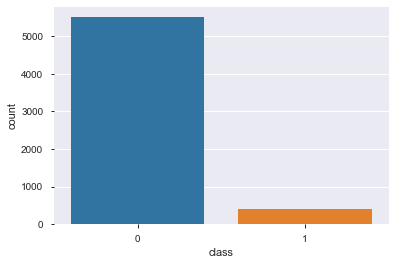

In [15]:
import seaborn as sns
sns.countplot(bankruptcy_df['class'])

In [16]:
# dropping duplicate values 

bankruptcy_df.drop_duplicates(keep=False,inplace=True) 

In [17]:
#delete because of large number of missing values

del bankruptcy_df['Attr37']

In [18]:
#imputing missing values by mean

bankruptcy_df.fillna(bankruptcy_df.mean(), inplace=True)

#number of missing values

bankruptcy_df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 64, dtype: int64

In [19]:
#delete because of high correlation

bankruptcy_df = bankruptcy_df.drop(['Attr11','Attr16','Attr18','Attr22','Attr23','Attr26','Attr31','Attr33',
        'Attr34','Attr35','Attr38','Attr4','Attr40','Attr44','Attr46','Attr48','Attr49','Attr50','Attr54',
        'Attr56','Attr60','Attr62','Attr63','Attr64','Attr7','Attr8'], axis = 1)

# FEATURE SELECTION USING Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [21]:
# Create a list of feature names
feature_labels = ['Attr1','Attr2','Attr3','Attr5','Attr6','Attr9','Attr10',
              'Attr12','Attr13','Attr14','Attr15','Attr17','Attr19','Attr20',
              'Attr21','Attr24','Attr25','Attr27','Attr28','Attr29','Attr30',
              'Attr32','Attr36','Attr39',
              'Attr41','Attr42','Attr43','Attr45','Attr47',
              'Attr51','Attr52','Attr53','Attr55','Attr57','Attr58','Attr59',
               'Attr61']

In [23]:
#Create X from the features
X = bankruptcy_df[feature_labels].values

# Create y from output
y = bankruptcy_df['class'].values.ravel()

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
rf_clf.fit(X, y)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, rf_clf.feature_importances_):
    print(feature)

('Attr1', 0.027591918833885107)
('Attr2', 0.016095535109824543)
('Attr3', 0.024633088062148565)
('Attr5', 0.017566884919741874)
('Attr6', 0.022341684789630053)
('Attr9', 0.024445543623779965)
('Attr10', 0.018169188943307345)
('Attr12', 0.020546371953517942)
('Attr13', 0.029548036841272433)
('Attr14', 0.027224671754813624)
('Attr15', 0.02586829696739935)
('Attr17', 0.016494773722498114)
('Attr19', 0.02392922848783537)
('Attr20', 0.014438103931648572)
('Attr21', 0.09961359554542011)
('Attr24', 0.038206224024632474)
('Attr25', 0.022354495094863536)
('Attr27', 0.06966182184329177)
('Attr28', 0.022296572829685384)
('Attr29', 0.02764127489026749)
('Attr30', 0.0163657865079402)
('Attr32', 0.016173909103129686)
('Attr36', 0.018125411522987286)
('Attr39', 0.056015258394595084)
('Attr41', 0.045584182145104)
('Attr42', 0.04182460764531087)
('Attr43', 0.018639018353756486)
('Attr45', 0.01903872933861213)
('Attr47', 0.013465773485520045)
('Attr51', 0.018854939962981758)
('Attr52', 0.015557464847323

In [24]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(rf_clf, threshold=0.03)

# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
     

In [25]:
#Print the names of the most important features

for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Attr21
Attr24
Attr27
Attr39
Attr41
Attr42
Attr58


In [26]:
X_imp_features = sfm.transform(X)

In [27]:
#converting X_filtered to Dataframe

X_imp_features = pd.DataFrame(data=X_imp_features,
          index=np.arange(1, 5791),
          columns=np.arange(1, 8))


# SMOTE+ENN TECHNIQUE

In [29]:
# Split the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(X_imp_features, y, test_size=0.2, random_state=0)

0    5384
1     406
Name: class, dtype: int64

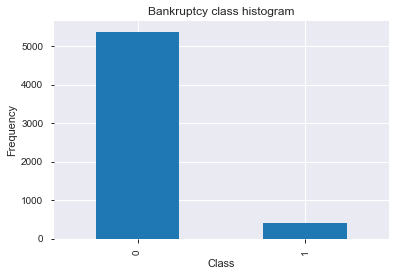

In [30]:
import matplotlib.pyplot as plt

pd.value_counts(bankruptcy_df['class']).plot.bar()
plt.title('Bankruptcy class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df1['class'].value_counts()

In [31]:
#SMOTE+ENN Technique

from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state=0)

columns = X_train.columns

X_res, y_res = sme.fit_resample(X_train, y_train)

#X_res = pd.DataFrame(data=X_res,columns=columns)
#y_res = pd.DataFrame(data=y_res,columns=['y'])


print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4300, 1: 332})
Resampled dataset shape Counter({1: 3774, 0: 3328})


# BUILDING RANDOM FOREST MODEL

In [18]:
# Create a new random forest classifier for the most important features
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_rf_pred = clf.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_rf_pred)

0.9373634377276038

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_rf_pred)

array([[1264,   64],
       [  22,   23]], dtype=int64)

In [21]:
from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_rf_pred) # Create CM From Data
cm.table
print(cm)

Predict    0          1          
Actual
0          1264       64         

1          22         23         





Overall Statistics : 

95% CI                                                            (0.92455,0.95018)
ACC Macro                                                         0.93736
AUNP                                                              0.73146
AUNU                                                              0.73146
Bennett S                                                         0.87473
CBA                                                               0.60809
CSI                                                               0.35509
Chi-Squared                                                       157.15553
Chi-Squared DF                                                    1
Conditional Entropy                                               0.3023
Cramer V                                                          0.33832
Cross Entropy                              

In [43]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1264
False Positives:  64
False Negatives:  22
True Positives:  23


In [42]:
#Specificity
Specificity = tn/(tn+fp) 
print("Specificity {:0.2f}".format(Specificity))

#Recall 
Recall = tp/(tp+fn) 
print("Recall / Sensitivity {:0.2f}".format(Recall))

#Precision
Precision = tp / (tp + fp)

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Specificity 0.95
Recall / Sensitivity 0.51
F1 Score 0.35


# BUILDING DECISION TREE MODEL

In [26]:
#!pip install pydot

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
'''
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
'''

In [47]:
'''
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_res, y_res)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

'''

In [51]:
'''
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
'''

Accuracy: 0.9067734887108522


In [54]:
'''
#Confusion Matrix summary

from pycm import *

cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) # Create CM From Data
print(cm)
'''

Predict    0          1          
Actual
0          1219       109        

1          19         26         





Overall Statistics : 

95% CI                                                            (0.89139,0.92215)
ACC Macro                                                         0.90677
AUNP                                                              0.74785
AUNU                                                              0.74785
Bennett S                                                         0.81355
CBA                                                               0.55526
CSI                                                               0.33647
Chi-Squared                                                       120.6323
Chi-Squared DF                                                    1
Conditional Entropy                                               0.42824
Cramer V                                                          0.29641
Cross Entropy                              

In [57]:
'''

#Calculating TP, FP, FN, TN

from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

'''

True Negatives:  26
False Positives:  109
False Negatives:  19
True Positives:  1219


In [59]:
'''

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

'''

Precision 0.92
Recall 0.98
F1 Score 0.95


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


InvocationException: GraphViz's executables not found

NameError: name 'X_res' is not defined

array([[ 1.59300000e-01,  4.00410000e-01,  2.61130000e-01, ...,
         1.48060000e+00,  4.12340000e+03,  2.95950000e-01],
       [ 2.01730000e-01,  4.92350000e-02,  3.00280000e-01, ...,
         1.43280000e+00,  1.82710000e+05,  2.16440000e-01],
       [ 8.92100000e-02,  4.08070000e-01,  8.68440000e-02, ...,
         1.09820000e+00,  5.68660000e+03,  1.50710000e-01],
       ...,
       [ 9.18951889e-02,  2.08163499e-01,  4.12974347e-01, ...,
         2.02742329e+00,  3.65289975e+04,  1.16490596e-01],
       [-1.43202771e-01,  7.62123523e-01, -5.63932000e-02, ...,
         6.03159091e-01, -1.56597550e+03, -6.12026998e-01],
       [ 2.26502362e-01,  5.44586797e-01, -8.56069634e-02, ...,
         7.73152459e-01, -1.63964350e+03,  5.22451954e-01]])

# BUILDING KNN MODEL

In [26]:
import numpy as np
from sklearn import neighbors
import pandas as pd

In [27]:
clf_knn = neighbors.KNeighborsClassifier()

In [28]:
clf_knn.fit(X_res, y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Limited feature Test Data
y_knn_pred = clf_knn.predict(X_test)

# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_knn_pred)

0.7691187181354697

In [31]:
accuracy = clf_knn.score(X_test, y_test)
print(accuracy)

0.7691187181354697


In [44]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_knn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1031
False Positives:  297
False Negatives:  20
True Positives:  25


In [45]:

#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Precision 0.08
Recall 0.56
F1 Score 0.14


#    # BUILDING MODEL USING BASELINE NEURAL NETWORK

In [23]:
!pip install keras

In [25]:
!pip install tensorflow

    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'
    Running setup.py install for absl-py: started
    Running setup.py install for absl-py: finished with status 'done'
    Running setup.py install for opt-einsum: started
    Running setup.py install for opt-einsum: finished with status 'done'
    Running setup.py install for gast: started
    Running setup.py install for gast: finished with status 'done'


ERROR: tensorboard 2.0.1 has requirement setuptools>=41.0.0, but you'll have setuptools 40.6.2 which is incompatible.


In [34]:
from sklearn.preprocessing import StandardScaler 

In [35]:
# Define the scaler 
scaler = StandardScaler().fit(X_res)

# Scale the train set
X_nn_res = scaler.transform(X_res)

# Scale the test set
X_nn_test = scaler.transform(X_test)

In [36]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(26,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [61]:
# Model output shape
model.output_shape

# Model summary
model.summary

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

[array([[-0.08973274, -0.01515645, -0.07958195, -0.11998275, -0.33572605,
         -0.03796527,  0.38072094,  0.306105  , -0.03693557,  0.17863134,
          0.37695298, -0.2600903 ],
        [ 0.17869118,  0.15177926, -0.08697787,  0.29204586, -0.24601898,
          0.15244064, -0.12780043, -0.14328715, -0.01484686,  0.14463529,
         -0.0214029 , -0.05454707],
        [ 0.04781073,  0.15747043, -0.33703503, -0.09809032,  0.31258205,
         -0.00111544, -0.2591575 , -0.05609158, -0.20126534,  0.21378061,
          0.21019825, -0.23269787],
        [-0.02454963, -0.09044981, -0.36949396,  0.1504983 , -0.01109096,
          0.01365343, -0.3963243 ,  0.20717159,  0.07827911,  0.26770732,
         -0.24627297,  0.27957204],
        [ 0.01545563, -0.08697832, -0.15749775, -0.08023345,  0.3907363 ,
         -0.06045473, -0.09825668, -0.30674106, -0.3328552 , -0.24149695,
          0.1240218 , -0.10105941],
        [ 0.34488443,  0.07198009,  0.35916194,  0.04757503, -0.29744452,
      

In [63]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_nn_res, y_res,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.5825 - accuracy: 0.7035
Epoch 2/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.3789 - accuracy: 0.8500
Epoch 3/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2774 - accuracy: 0.8925
Epoch 4/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2406 - accuracy: 0.9076
Epoch 5/20
8006/8006 [==============================] - 13s 2ms/step - loss: 0.2203 - accuracy: 0.9126
Epoch 6/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.2087 - accuracy: 0.9147
Epoch 7/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1956 - accuracy: 0.9207
Epoch 8/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1896 - accuracy: 0.9232
Epoch 9/20
8006/8006 [==============================] - 14s 2ms/step - loss: 0.1868 - accuracy: 0.9257
Epoch 10/20
8006/8006 [==============================] - 14s 2ms/step - l

In [64]:
y_nn_pred = model.predict(X_test)

In [65]:
score = model.evaluate(X_nn_test, y_test,verbose=1)

print(score)

1373/1373 [==============================] - 0s 44us/step
[0.3472626213600231, 0.8623452186584473]


In [66]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_nn_pred)

array([[1257,   71],
       [  41,    4]], dtype=int64)

In [68]:
# Precision 
precision_score(y_test, y_nn_pred)

0.05333333333333334

In [69]:
# Recall
recall_score(y_test, y_nn_pred)

0.08888888888888889

In [70]:
# F1 score
f1_score(y_test,y_nn_pred)

0.06666666666666668

In [71]:
#Calculating TP, FP, FN, TN

from sklearn.metrics import confusion_matrix

tp, fp, fn, tn = confusion_matrix(y_test, y_nn_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


True Negatives:  4
False Positives:  71
False Negatives:  41
True Positives:  1257


In [72]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))

#F1 Score
f1 = (2*(Precision*Recall)/(Precision + Recall))
print("F1 Score {:0.2f}".format(f1))

Precision 0.95
Recall 0.97
F1 Score 0.96
